In [1]:
# Load Packages for the directory

import numpy as np
import pandas as pd
from skimage import io
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import pydicom as dicom
import os


In [2]:
# Setting path

PATH = 'D:/Python coding/Datasets and codes/CT_MedicalImages'
print(os.listdir(PATH))

['dicom_dir', 'full_archive.npz', 'overview.csv', 'tiff_images', 'Visualizing.py']


In [3]:
#Read the dataframe in directory

data = pd.read_csv(os.path.join(PATH, "overview.csv"))
data.head(2)

,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm


In [4]:
tiff_path = os.path.join(PATH, "tiff_images")
len_tiff = len(os.listdir(tiff_path))
print(f"Number of tiff images found : {len_tiff}")

Number of tiff images found : 100


In [5]:
#tiff_data = [{'path':filepath} for filepath in glob(PATH+'tiff_images/*.tif')]
#tiff_df = pd.DataFrame(tiff_data)

In [6]:
def create_data(path):
    data = [{'path':filepath} for filepath in glob(os.path.join(path,'*'))]
    df = pd.DataFrame(data)
    df['file'] = df['path'].map(os.path.basename)
    df['ID'] = df['file'].map(lambda x: str(x.split('_')[1]))
    df['Age'] = df['file'].map(lambda x: int(x.split('_')[3]))
    df['Contrast'] = df['file'].map(lambda x:
                                    bool(int(x.split('_')[5])))
    df['Modality'] = df['file'].map(lambda x: str(x.split('_')[-2]))
    return df


In [7]:
tiff_df = create_data(tiff_path)
tiff_df.shape

(100, 6)

In [8]:
tiff_df.head(5)

,path,file,ID,Age,Contrast,Modality
0,D:/Python coding/Datasets and codes/CT_Medical...,ID_0000_AGE_0060_CONTRAST_1_CT.tif,0000,60,True,1
1,D:/Python coding/Datasets and codes/CT_Medical...,ID_0001_AGE_0069_CONTRAST_1_CT.tif,0001,69,True,1
2,D:/Python coding/Datasets and codes/CT_Medical...,ID_0002_AGE_0074_CONTRAST_1_CT.tif,0002,74,True,1
3,D:/Python coding/Datasets and codes/CT_Medical...,ID_0003_AGE_0075_CONTRAST_1_CT.tif,0003,75,True,1
4,D:/Python coding/Datasets and codes/CT_Medical...,ID_0004_AGE_0056_CONTRAST_1_CT.tif,0004,56,True,1


In [9]:
# reading DICOM Data
dicom_path = os.path.join(PATH, "dicom_dir")
DICOM_len = len(os.listdir(dicom_path))
DICOM_len

100

In [10]:
data_dicom = create_data(dicom_path)
data_dicom.shape

(100, 6)

In [11]:
data_dicom.head(5)

,path,file,ID,Age,Contrast,Modality
0,D:/Python coding/Datasets and codes/CT_Medical...,ID_0000_AGE_0060_CONTRAST_1_CT.dcm,0000,60,True,1
1,D:/Python coding/Datasets and codes/CT_Medical...,ID_0001_AGE_0069_CONTRAST_1_CT.dcm,0001,69,True,1
2,D:/Python coding/Datasets and codes/CT_Medical...,ID_0002_AGE_0074_CONTRAST_1_CT.dcm,0002,74,True,1
3,D:/Python coding/Datasets and codes/CT_Medical...,ID_0003_AGE_0075_CONTRAST_1_CT.dcm,0003,75,True,1
4,D:/Python coding/Datasets and codes/CT_Medical...,ID_0004_AGE_0056_CONTRAST_1_CT.dcm,0004,56,True,1


In [36]:
def display_images(data, dim=15, imtype='TIFF'):
    img_data = list(data[:dim].T.to_dict().values())
    f, ax = plt.subplots(5, 3, figsize=(20,20))
    for i, each_data in enumerate(img_data):
        if (imtype=='TIFF'):
            tif_read = io.imread(each_data['path'])
            ax[i//3, i%3].matshow(tif_read, cmap='gray')
        elif (imtype=='DICOM'):
            dicom_read = dicom.read_file(each_data['path'])
            ax[i//3, i%3].imshow(dicom_read.pixel_array, cmap=plt.cm.bone)
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('Modality: {Modality} Age: {Age}\nSlice: {ID} Contrast: {Contrast}'.format(**each_data))
    plt.show()

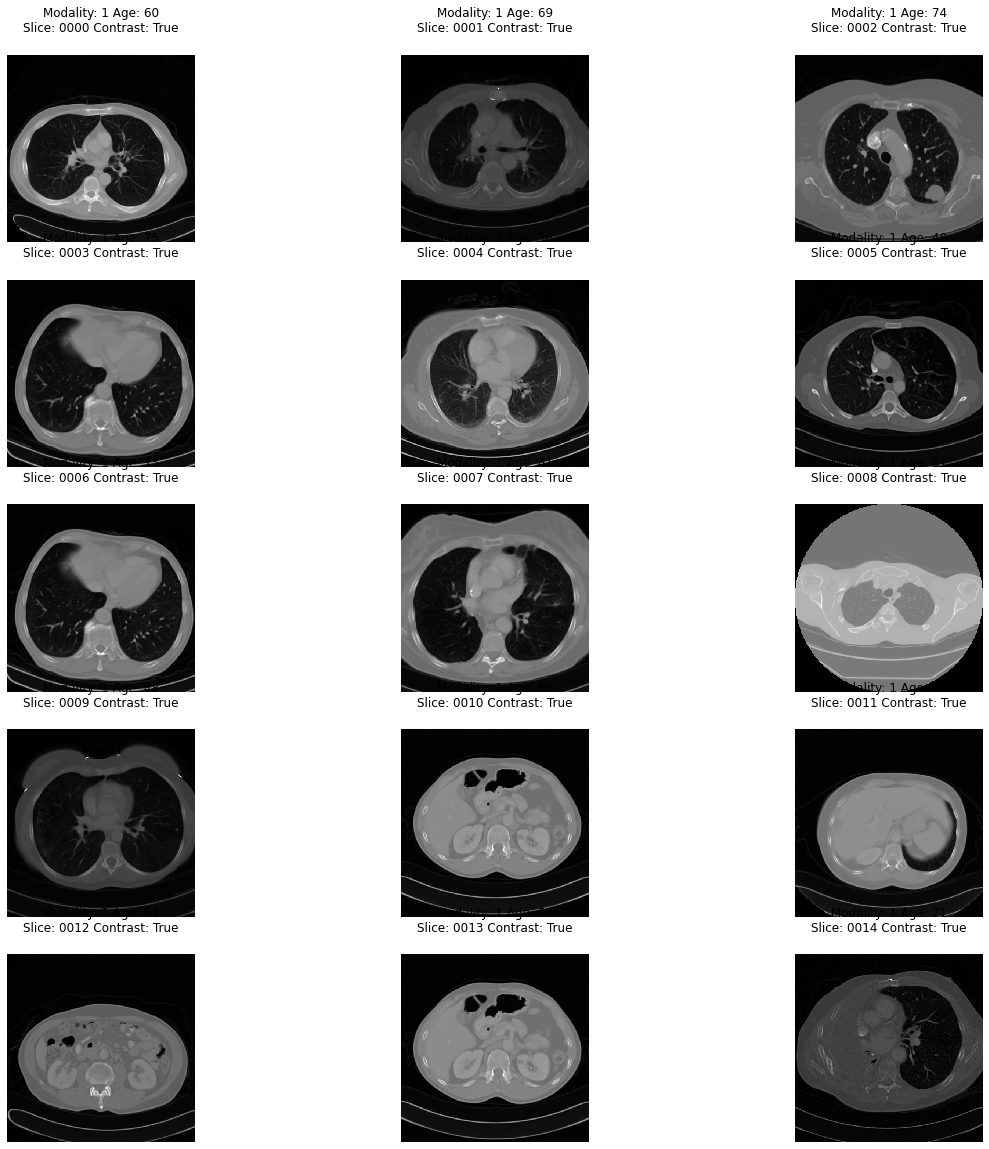

In [37]:
display_images(tiff_df,dim=15,imtype='TIFF')

In [38]:
def extract_voxel_data(list_of_dicom_files):  
    datasets = [dicom.read_file(f) for f in list_of_dicom_files]  
    try:
        voxel_ndarray, ijk_to_xyz = dicom_numpy.combine_slices(datasets)
    except dicom_numpy.DicomImportException as e:
        raise  
    return voxel_ndarray

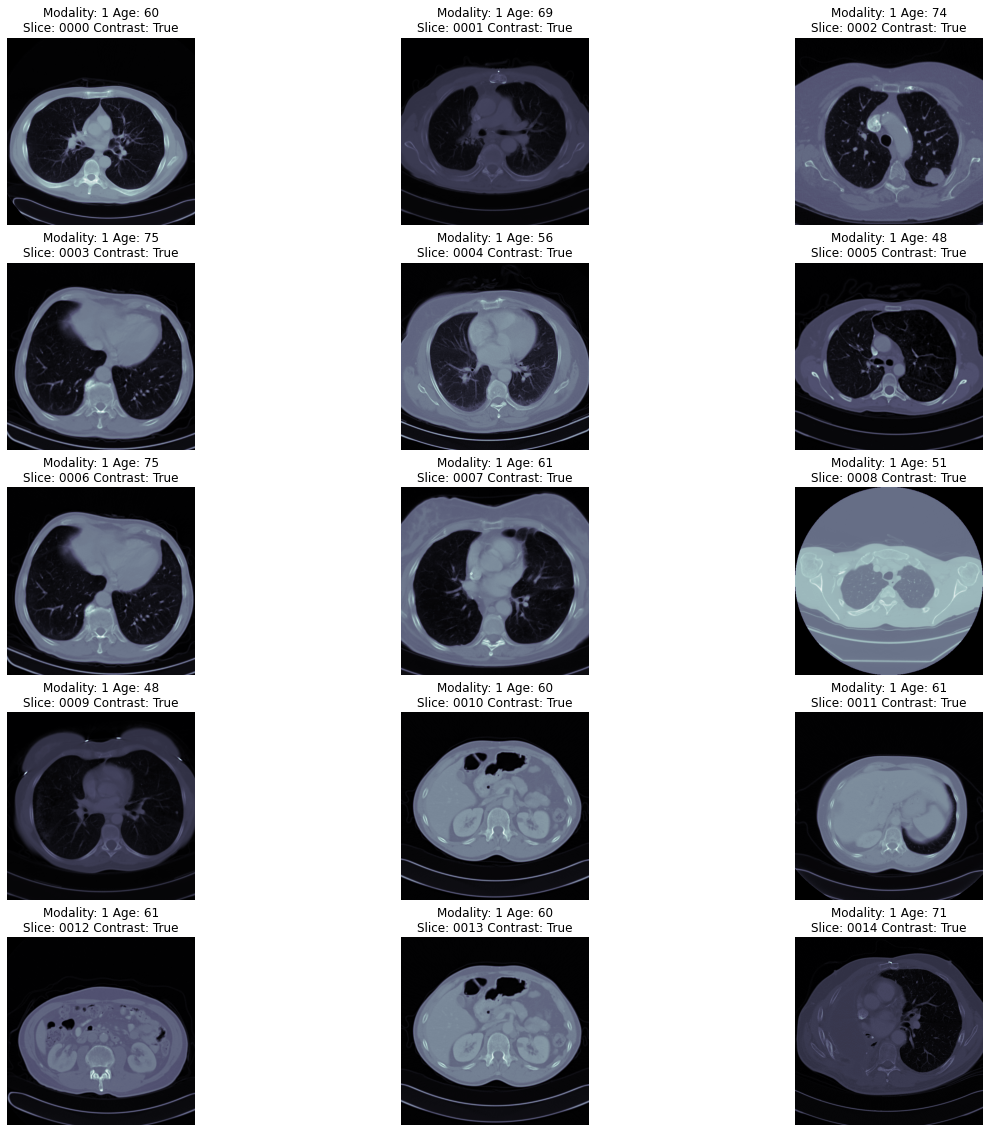

In [39]:
display_images(data_dicom,15,'DICOM')

In [40]:
dicom_file_path = list(data_dicom[:1].T.to_dict().values())[0]['path']
dicom_file_dataset = dicom.read_file(dicom_file_path)
dicom_file_dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

In [41]:
print("Modality: {}\nManufacturer: {}\nPatient Age: {}\nPatient Sex: {}\nPatient Name: {}\nPatient ID: {}".format(
    dicom_file_dataset.Modality, 
    dicom_file_dataset.Manufacturer,
    dicom_file_dataset.PatientAge,
    dicom_file_dataset.PatientSex,
    dicom_file_dataset.PatientName,
    dicom_file_dataset.PatientID))

Modality: CT
Manufacturer: SIEMENS
Patient Age: 060Y
Patient Sex: M
Patient Name: TCGA-17-Z034
Patient ID: TCGA-17-Z034


In [42]:
def show_dicom_images(data):
    img_data = list(data[:16].T.to_dict().values())
    f, ax = plt.subplots(4,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):

        data_row_img = dicom.read_file(data_row['path'])
        modality = data_row_img.Modality
        age = data_row_img.PatientAge
        
        ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {} Age: {}\nSlice: {} Contrast: {}'.format(
         modality, age, data_row['ID'], data_row['Contrast']))
    plt.show()

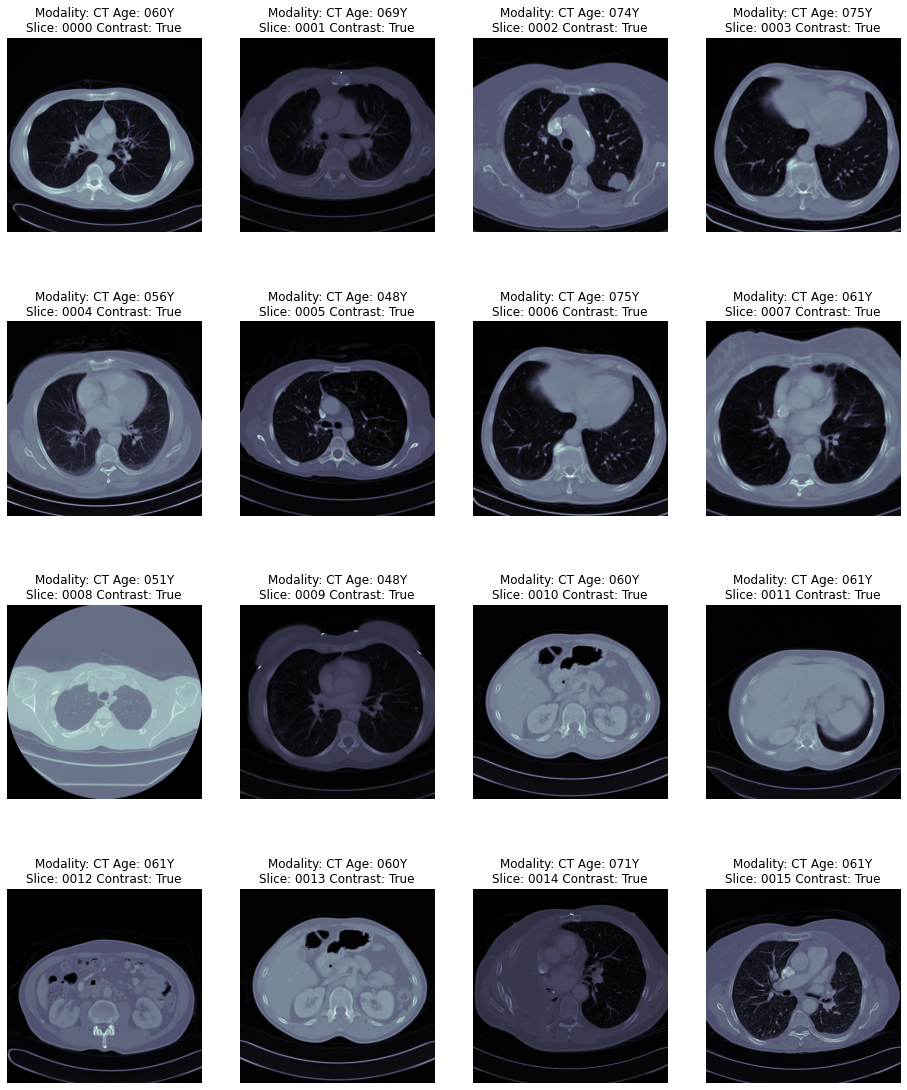

In [43]:
show_dicom_images(data_dicom)